# Decrypter
Di seguito viene proposto il programma che permette di decriptare delle immagini attraverso l'utilizzo della formica di Langton.

In questa sezione vengono importate le librerie necessarie per la manipolazione delle immagini e le funzioni contenute in Algorithm.ipynb.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from IPython.display import display, Markdown
%run Algorithm.ipynb

Questa funzione si occupa di decriptare l'immagine, basandosi sulla matrice criptata, gli step, il valore di soglia, la direzione e la posizione della formica di criptazione.
Restituisce la matrice di decriptazione.

In [2]:
def langton_ant_decrypter(grid, steps, direction, x, y, threshold):
    direction = (direction + 2) % 4

    x, y = ant_movement(direction, x, y, grid)

    for _ in range(steps):
        grid, x, y, direction = ant_step(grid, x, y, direction, threshold)
    return grid

Carica l'immagine cripata, creando la matrice corrispondente.

In [3]:
image_name = input("Nome dell'immagine da decriptare: ")

# Carica l'immagine
image = plt.imread('images_encrypted//' + image_name + ".png")

min_value = np.min(image)
max_value = np.max(image)
scaled_image = ((image - min_value) / (max_value - min_value) * 255).astype(int)

grid_encrypted = scaled_image.copy()

La sezione di codice seguente si occupa di mostrare l'immagine criptata.

### Immagine criptata

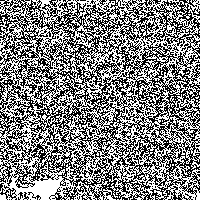

In [4]:
grid_normalized = ((grid_encrypted - grid_encrypted.min()) / (grid_encrypted.max() - grid_encrypted.min()) * 255).astype(np.uint8)

img_encrypted = Image.fromarray(grid_normalized)

display(Markdown("### Immagine criptata"))
display(img_encrypted)

Di seguito viene importato il file JSON contente i dati necessari alla decriptazione.

In [5]:
with open('images_encrypted//' + image_name + ".json", 'r') as file:
    decrypt_data = json.load(file)

direction = decrypt_data["direction"]
x, y = decrypt_data["position"]
steps = decrypt_data["steps"]
threshold = decrypt_data["threshold"]

In questa sezione viene richiamata la funzione che si occupa di decriptare la matrice.

In [ ]:
grid_decrypted = langton_ant_decrypter(grid_encrypted.copy(), steps, direction, x, y, threshold)

Questa sezione di codice mostra l'immagine decriptata e la salva come png.

### Immagine decriptata

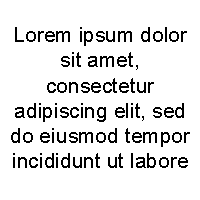

In [6]:
grid_normalized = ((grid_decrypted - grid_decrypted.min()) / (grid_decrypted.max() - grid_decrypted.min()) * 255).astype(np.uint8)

img_decrypted = Image.fromarray(grid_normalized)
img_decrypted.save("images_decrypted//" + image_name + ".png")

display(Markdown("### Immagine decriptata"))
display(img_decrypted)